In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
# define parameters for NN
img_width, img_height = 32, 32
batch_size = 128
num_classes = 10
epochs = 15

In [ ]:
# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

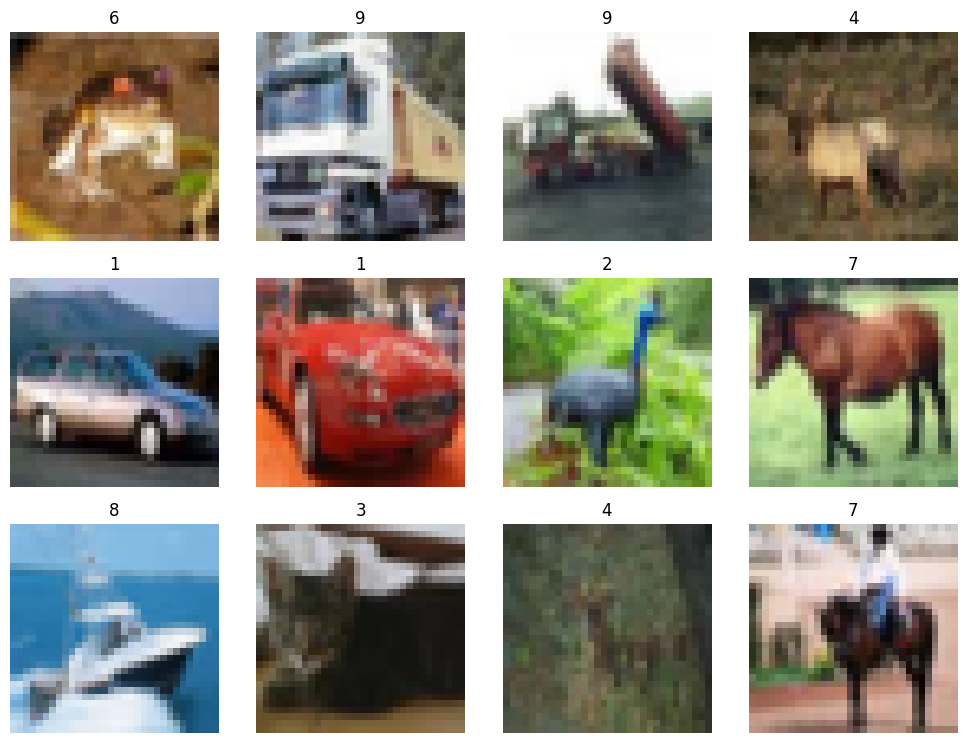

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(12):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    label = np.argmax(y_train[i])
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Create a custom input layer to handle 32x32 images
input_tensor = Input(shape=(img_width, img_height, 3))
# Use tf.image.resize to upscale the input to 48x48 (smallest size VGG16 accepts)
resized_input = tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (48, 48)))(input_tensor)

In [ ]:
# Initialize a Sequential model
model = Sequential()

# Use tf.image.resize to upscale the input to 48x48 (smallest size VGG16 accepts)
model.add(tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (48, 48)), input_shape=(img_width, img_height, 3)))

# Convolutional Block 1 (64 filters, 3×3 filters, same padding) + MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=2))

# Convolutional Block 2 (128 filters, 3×3 filters, same padding) + MaxPooling
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=2))

# Convolutional Block 3 (256 filters, 3×3 filters, same padding) + MaxPooling
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=2))

# Convolutional Block 4 (512 filters, 3×3 filters, same padding) + MaxPooling
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=2))

# Convolutional Block 5 (512 filters, 3×3 filters, same padding) + MaxPooling
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=2))

# Flattening
model.add(Flatten())

# Fully Connected Layer 1 (4096 units, ReLU activation)
model.add(Dense(4096, activation='relu'))

# Fully Connected Layer 2 (4096 units, ReLU activation)
model.add(Dense(4096, activation='relu'))

# Fully Connected Layer 3 (1000 units, Softmax activation for classification)
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,638,218 (128.32 MB)

 Trainable params: 33,638,218 (128.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 86s 175ms/step - accuracy: 0.1976 - loss: 2.0844 - val_accuracy: 0.4161 - val_loss: 1.5201
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 136ms/step - accuracy: 0.4383 - loss: 1.4868 - val_accuracy: 0.4989 - val_loss: 1.3790
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.5558 - loss: 1.2025 - val_accuracy: 0.6202 - val_loss: 1.0470
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.6447 - loss: 0.9856 - val_accuracy: 0.6636 - val_loss: 0.9505
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 136ms/step - accuracy: 0.6981 - loss: 0.8455 - val_accuracy: 0.6911 - val_loss: 0.8818
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 137ms/step - accuracy: 0.7542 - loss: 0.6954 - val_accuracy: 0.7164 - val_loss: 0.8369
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 136ms/step - accuracy: 0.8012 - loss: 0.5685 - val_accuracy: 0.7482 - val_loss: 0.7383
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 135ms/step - accuracy: 0.8371 - loss: 0

In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step


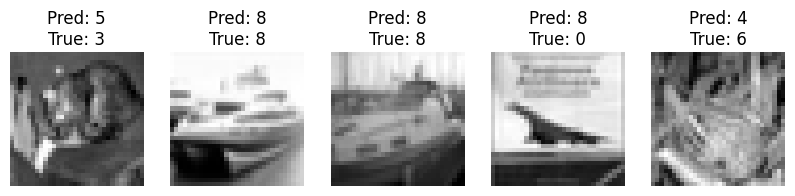

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    # Convert color image to grayscale
    plt.imshow(x_test[i].mean(axis=2), cmap='gray') # Calculate the mean across color channels
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(y_test[i])}")
    plt.axis('off')

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []

for train_index, val_index in kfold.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model.fit(x_train_fold, y_train_fold,
              batch_size=128, epochs=5, verbose=1,
              validation_data=(x_val_fold, y_val_fold))

    scores = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f"Fold score: {scores[1]*100}%")
    cvscores.append(scores[1] * 100)

print(f"Mean accuracy: {np.mean(cvscores)}% (+/- {np.std(cvscores)})")

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 158ms/step - accuracy: 0.9746 - loss: 0.0743 - val_accuracy: 0.9704 - val_loss: 0.0804
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.9791 - loss: 0.0589 - val_accuracy: 0.9628 - val_loss: 0.1137
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 132ms/step - accuracy: 0.9831 - loss: 0.0518 - val_accuracy: 0.9510 - val_loss: 0.1565
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.9743 - loss: 0.0765 - val_accuracy: 0.9582 - val_loss: 0.1239
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.9847 - loss: 0.0464 - val_accuracy: 0.9642 - val_loss: 0.1116
Fold score: 96.42000198364258%
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.9786 - loss: 0.0657 - val_accuracy: 0.9861 - val_loss: 0.0443
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.9828 - loss: 0.0528 - val_accuracy: 0.9810 - val_loss: 0.0559
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - acc

In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


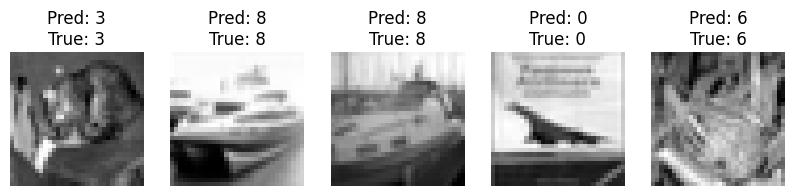

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    # Convert color image to grayscale
    plt.imshow(x_test[i].mean(axis=2), cmap='gray') # Calculate the mean across color channels
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(y_test[i])}")
    plt.axis('off')